In [1]:
import matplotlib.pylab as plt
import matplotlib as mpl
import pickle
import numpy as np

plt.style.use("ggplot")
plt.rcParams['axes.prop_cycle']
plt.rcParams["font.family"] = "Times New Roman"
# plt.rcParams["font.serif"] = "DejaVu Sans"
# plt.rcParams["mathtext.default"] = "regular"

# 自定义数学公式中每种字体，将 rm 设置为 TNR，it 用默认的，通过 \mathit 和 \mathrm 分别控制公式字体
plt.rcParams["mathtext.fontset"] = "custom"
# plt.rcParams['mathtext.sf'] = 'DejaVu Sans'
plt.rcParams['mathtext.rm'] = 'Times New Roman'
# plt.rcParams["mathtext.it"] = "Times New Roman:italic"
# plt.rcParams["mathtext.bf"] = "Times New Roman:bold"
# plt.rcParams["mathtext.tt"] = "Times New Roman:monospace"

In [ ]:
def l2norm(list1, list2):
    if len(list1) != len(list2):
        raise ValueError("Both lists must have the same length.")
    if not list1 or all(value == 0 for value in list1):
        raise ValueError("The first list cannot be all zeros or empty for L2 norm-based error ratio calculation.")
    l2_norm_difference = sum((x - y) ** 2 for x, y in zip(list1, list2)) ** 0.5
    l2_norm_reference = sum(x ** 2 for x in list1) ** 0.5
    return l2_norm_difference / l2_norm_reference

with open("/code/TKDE-SHAP-main/sources/expres/cnn_model_10_emnist_same.res", "rb") as f:
    data = pickle.load(f)

exact = data['Comb-Shapley'][0]
for alg in data:
    sv, time = data[alg]
    print(alg, 0 if alg in ["Comb-Shapley", "Perm-Shapley"] else l2norm(exact, sv), time)

Comb-Shapley 0 40134.94407950698
Perm-Shapley 0 2873672611.4812164
Extended-TMC 1.4863339826527737 1220.6398266439755
OR 0.5515814253618143 641.993547366932
$lambda$-MR 2.360835634921901 2504.465610602041
Extended-GTB 1.8642324447060217 1612.3121074719566
DIG-FL 0.992481602351207 655.1695729100175
CC-Shapley 0.7224055570667784 2553.725933776979
Light Sampling 0.022061484078930726 257.19810998400135
GTG-Shapley 2.7331448779901604 680.2464919268568


findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive


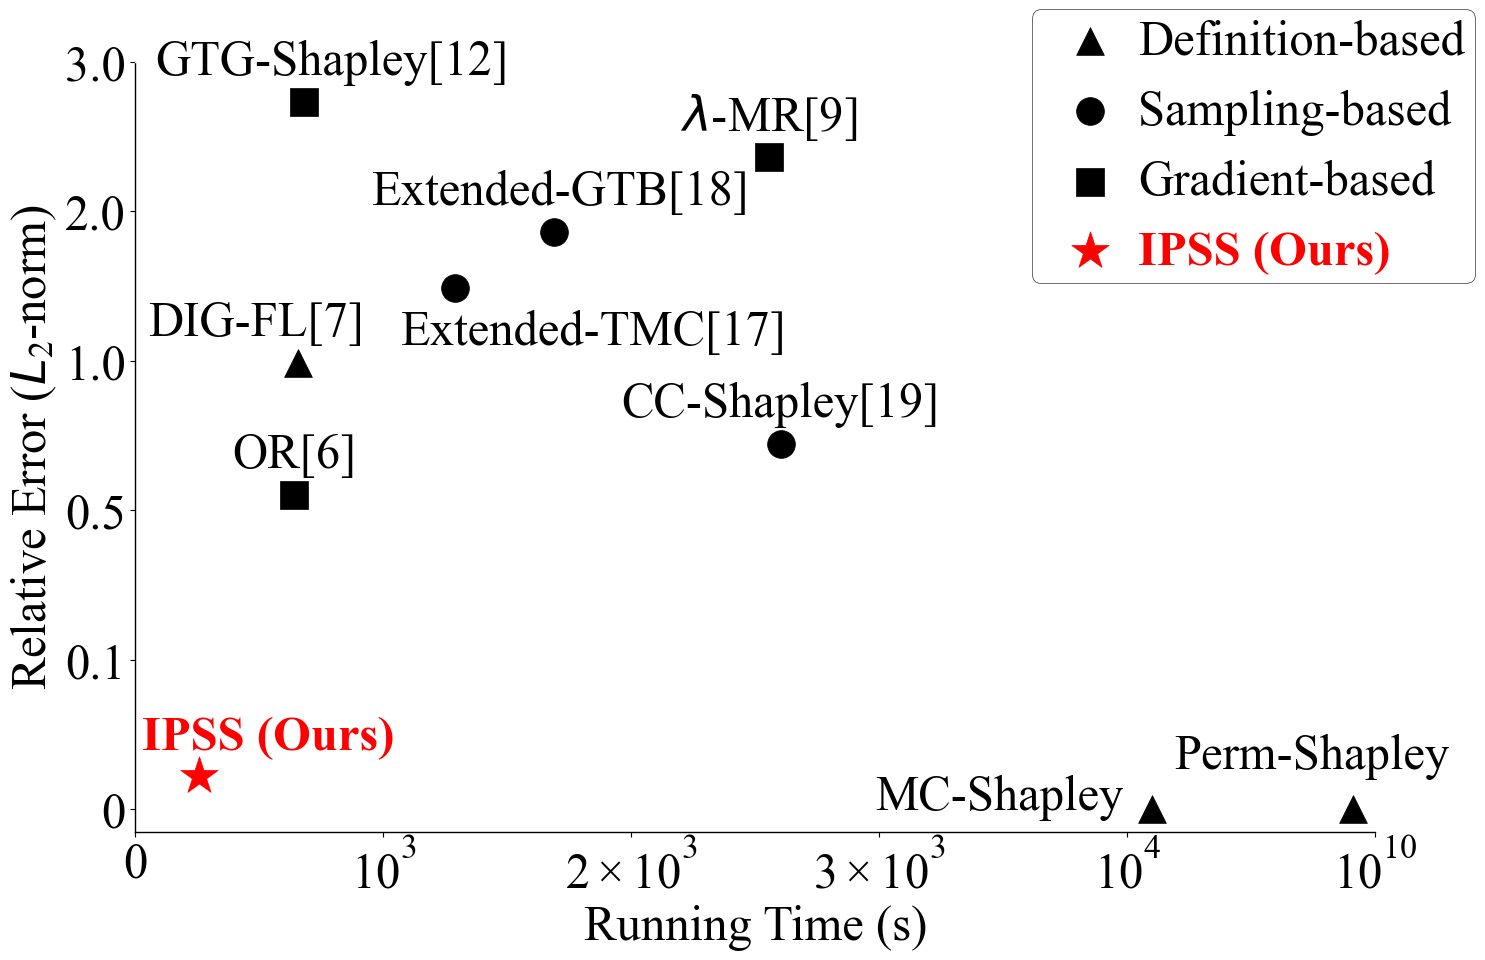

In [3]:
# 将原始数据映射到 [0, len(custom_ticks)-1] 区间，以便在等间距轴上显示
def map_to_custom_ticks(value, ticks, mapping="linear"):
    for i in range(len(ticks) - 1):
        if ticks[i] <= value < ticks[i + 1]:
            if mapping == "linear":
                return i + (value - ticks[i]) / (ticks[i + 1] - ticks[i])
            elif mapping == "log":
                return i + (np.log(value) - np.log(ticks[i])) / (np.log(ticks[i + 1]) - np.log(ticks[i]))
    return len(ticks) - 1  # 超出范围的点映射到最大刻度


# 实验数据
algs = ["MC-Shapley", "Perm-Shapley", "Extended-TMC", "OR", "$\mathit{\\lambda}$-MR", "Extended-GTB", "DIG-FL", "CC-Shapley", "GTG-Shapley"]
refs = [0, 0, 17, 6, 9, 18, 7, 19, 12]
methods = ["%s[%d]" % (alg, ref) if ref != 0 else alg for alg, ref in zip(algs, refs)] + ["IPSS (Ours)"]
times = [40134, 2873672611, 1220, 641, 2504, 1612, 655, 2553, 680, 257]
errors = [0, 0, 1.486, 0.551, 2.360, 1.864, 0.992, 0.722, 2.733, 0.022]
acceptable_error, acceptable_time = 0.1, 1000

# 创建图表和子图
fig = plt.figure(figsize=(16, 10))
ax = plt.gca()

# 按刻度映射原数据
x_ticks = [0, 1e3, 2e3, 3e3, 1e4, 1e10]
y_ticks = [0, 0.1, 0.5, 1.0, 2.0, 3.0]
times = [map_to_custom_ticks(x, x_ticks, "log" if x > 1e3 else "linear") for x in times]
errors = [map_to_custom_ticks(y, y_ticks) for y in errors]
acceptable_time = map_to_custom_ticks(acceptable_time, x_ticks)
acceptable_error = map_to_custom_ticks(acceptable_error, y_ticks)

# 设置范围和刻度
ax.set_xlim(0, len(x_ticks) - 1)
ax.set_ylim(-0.15, len(y_ticks) - 1)
ax.set_xticks(np.arange(len(x_ticks)))
ax.set_xticklabels([0, "$\mathrm{10^3}$", "$\mathrm{2\\times 10^3}$", "$\mathrm{3\\times 10^3}$", "$\mathrm{10^4}$", "$\mathrm{10^{10}}$"])
ax.set_yticks(np.arange(len(y_ticks)))
ax.set_yticklabels(y_ticks)


# 虚线和阴影
# ax.axhline(acceptable_error, color='black', linestyle='--')
# ax.axvline(acceptable_time, color='black', linestyle='--')
# ax.fill_between([0, 1], -0.15, 1, alpha=0.5, color='none', hatch='/', edgecolor='black', linewidth=0)

# 散点
fontsize = 35
groups = [
    ("Definition-based", [0, 1, 6], [(-110, 0), (-30, 30), (-30, 20)], "^", "black", 400),
    ("Sampling-based", [2, 5, 7], [(100, -40), (5, 20), (0, 20)], "o", "black", 400),
    ("Gradient-based", [3, 4, 8], [(0, 20), (0, 20), (20, 20)], "s", "black", 400),
    ("IPSS (Ours)", [9], [(50, 20)], "*", "red", 800)
]

from matplotlib.font_manager import FontProperties
font = FontProperties(fname="/code/TKDE-SHAP-main/htr_test/timesbd.tff", size=fontsize)
for label, index, xytext, marker, color, s in groups:
    for j, i in enumerate(index):
        ax.scatter(times[i], errors[i], color=color, marker=marker, s=s, label=label if j == 0 else "")
        ax.annotate(methods[i], (times[i], errors[i]), textcoords="offset points", fontsize=fontsize, xytext=xytext[j], ha='center', color=color, fontproperties=font if i == 9 else None)

# 其他格式
ax.grid(False)
ax.set_facecolor('white')

ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.tick_params(axis='both', colors='black', labelsize=fontsize)

ax.set_xlabel("Running Time (s)", color="black", fontsize=fontsize)
ax.set_ylabel("Relative Error ($\mathit{L_{2}}$-norm)", color="black", fontsize=fontsize)

legend = plt.legend(fontsize=fontsize, handletextpad=0, borderpad=0.2, bbox_to_anchor=(1.1, 1.1))
legend.get_frame().set_edgecolor("black")
legend.get_frame().set_facecolor("white")
for i, text in enumerate(legend.get_texts()):
    text.set_color(groups[i][4])
    if i == 3:
        text.set_fontproperties(font)

plt.show()

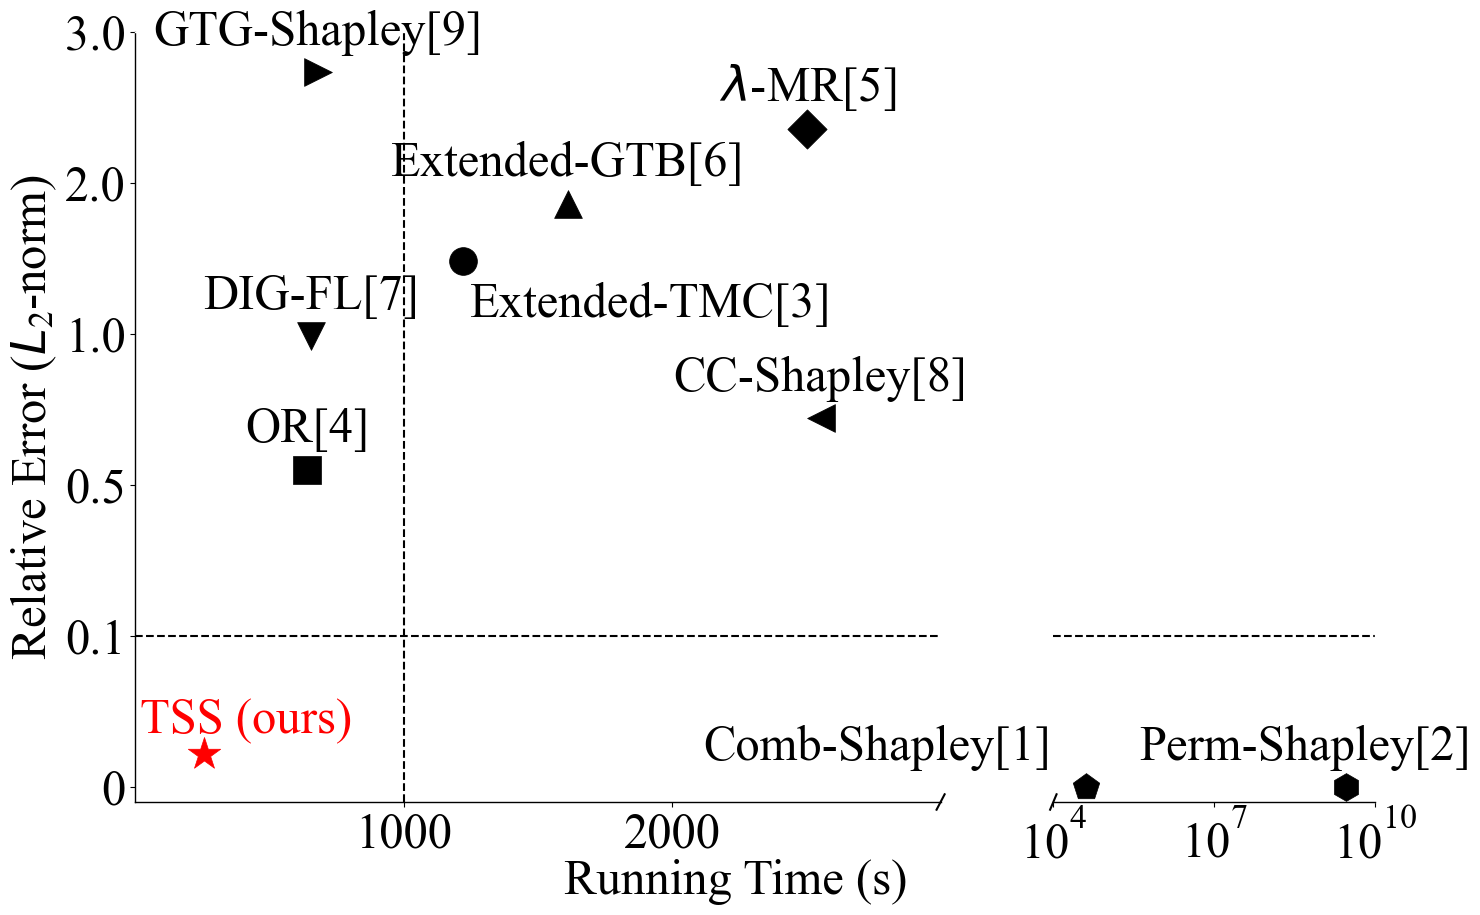

In [4]:
from matplotlib.ticker import FixedLocator, FixedFormatter


# 实验数据
algs = ["Comb-Shapley", "Perm-Shapley", "Extended-TMC", "OR", "$\lambda$-MR", "Extended-GTB", "DIG-FL", "CC-Shapley", "GTG-Shapley"]
refs = [1, 2, 3, 4, 5, 6, 7, 8, 9]
# plt.rc('text', usetex=True)
# methods = np.array(["$\\textsl{%s}^{[%d]}$" % (alg, ref) for alg, ref in zip(algs, refs)])
methods = np.array(["%s[%d]" % (alg, ref) for alg, ref in zip(algs, refs)])
errors = np.array([0, 0, 1.486, 0.551, 2.360, 1.864, 0.992, 0.722, 2.733])
times = np.array([40134, 2873672611, 1220, 641, 2504, 1612, 655, 2553, 680])
tss_x, tss_y = 257, 0.022

acceptable_error = 0.1
acceptable_time = 1000

# 创建图表和子图
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, gridspec_kw={'width_ratios': [1, 0.4], "wspace": 0.2}, figsize=(16, 10))

# 分离数据：左侧子图为小时间值，右侧子图为大时间值
small_mask = times < 40000
large_mask = times >= 40000
method_l, time_l, error_l = methods[small_mask], times[small_mask], errors[small_mask]
method_r, time_r, error_r = methods[large_mask], times[large_mask], errors[large_mask]

# 将原始数据映射到 [0, len(custom_ticks)-1] 区间，以便在等间距轴上显示
def map_to_custom_ticks(value, ticks):
    for i in range(len(ticks) - 1):
        if ticks[i] <= value < ticks[i + 1]:
            return i + (value - ticks[i]) / (ticks[i + 1] - ticks[i])
    return len(ticks) - 1  # 超出范围的点映射到最大刻度

y_ticks = [0, 0.1, 0.5, 1.0, 2.0, 3.0]
error_l = [map_to_custom_ticks(y, y_ticks) for y in error_l]
error_r = [map_to_custom_ticks(y, y_ticks) for y in error_r]
tss_y = map_to_custom_ticks(tss_y, y_ticks)
acceptable_error = map_to_custom_ticks(acceptable_error, y_ticks)
ax1.set_yticks(np.arange(len(y_ticks)))
ax1.set_yticklabels(y_ticks)
ax1.set_ylim(-0.1, len(y_ticks) - 1)
ax2.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

# 绘制左侧子图
marksize = 400
marker_l = ['o', 's', 'D', '^', 'v', '<', '>']
xy_l = [(0, 20) for _ in range(7)]
xy_l[0] = (135, -40)
for i, method in enumerate(method_l):
    ax1.scatter(time_l[i], error_l[i], color='black', marker=marker_l[i], s=marksize)
    ax1.annotate(method, (time_l[i], error_l[i]), textcoords="offset points", fontsize=fontsize, xytext=xy_l[i], ha='center')
ax1.set_xlim(0, 3000)  # 设置小值范围

# 绘制右侧子图（对数坐标）
marker_r = ['p', 'h']
xy_r = [(-150, 20), (-30, 20)]
for i, method in enumerate(method_r):
    ax2.scatter(time_r[i], error_r[i], color='black', marker=marker_r[i], s=marksize)
    ax2.annotate(method, (time_r[i], error_r[i]), textcoords="offset points", fontsize=fontsize, xytext=xy_r[i], ha='center')
ax2.set_xscale('log')
ax2.set_xlim(1e4, 1e10)  # 右侧设置对数刻度范围

ax1.scatter(tss_x, tss_y, color='red', marker='*', s=marksize + 200)
ax1.annotate('TSS (ours)', (tss_x, tss_y), textcoords="offset points", fontsize=fontsize, xytext=(30, 15), ha='center', color='red')

ax1.axhline(acceptable_error, color='black', linestyle='--')
ax2.axhline(acceptable_error, color='black', linestyle='--')
ax1.axvline(acceptable_time, color='black', linestyle='--')

ax1.grid(False)
ax2.grid(False)
ax1.set_facecolor('white')
ax2.set_facecolor('white')
ax1.spines['left'].set_color('black')
ax1.spines['bottom'].set_color('black')
ax2.spines['bottom'].set_color('black')
ax1.tick_params(axis='both', colors='black', labelsize=fontsize)
ax2.tick_params(axis='both', colors='black', labelsize=fontsize)

ax1.set_xticks([1000, 2000])
# ax1.set_yticks([0.1, 0.5, 1, 1.5, 2, 2.5])
ax2.set_xticks([1e4, 1e7, 1e10])


# 断轴标记
ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

# 添加断轴标志
d = 0.01  # 标记大小
k = 0.5
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((1 - k * d, 1 + k * d), (-d, +d), **kwargs)        # 右侧断轴标志
# ax1.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # 上方断轴标志

kwargs.update(transform=ax2.transAxes)  # 更新坐标轴
ax2.plot((-d, +d), (-d, +d), **kwargs)  # 左侧断轴标志
# ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # 上方断轴标志

# 标签和标题
fig.text(0.5, 0.03, "Running Time (s)", color="black", fontsize=fontsize, ha='center', va='center')
ax1.set_ylabel("Relative Error ($L_{2}$-norm)", color="black", fontsize=fontsize)
plt.show()